FileUpload(value={}, accept='.csv', description='Upload')

Dropdown(description='Choose keyword:', options=(('massage around me', 307140628489), ('massage in dallas', 31…

11373741
dallas massage


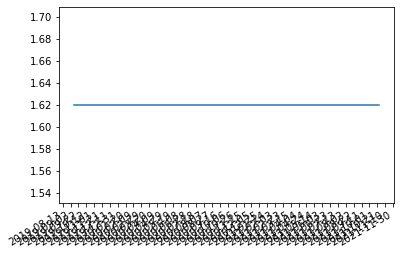

10116031
massage therapy school


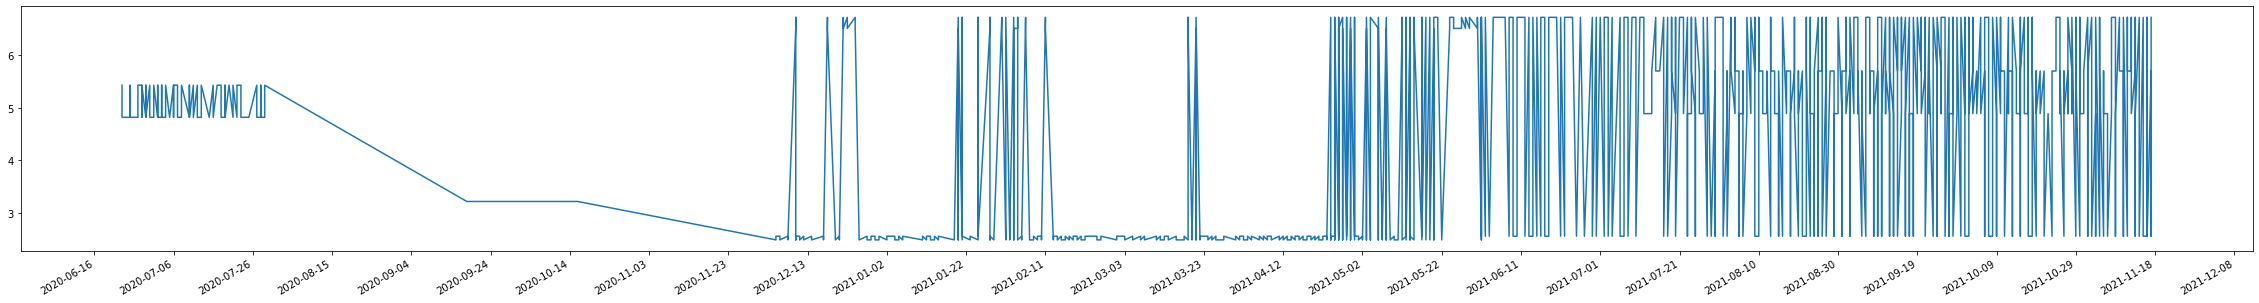

297112598103
myofascial release


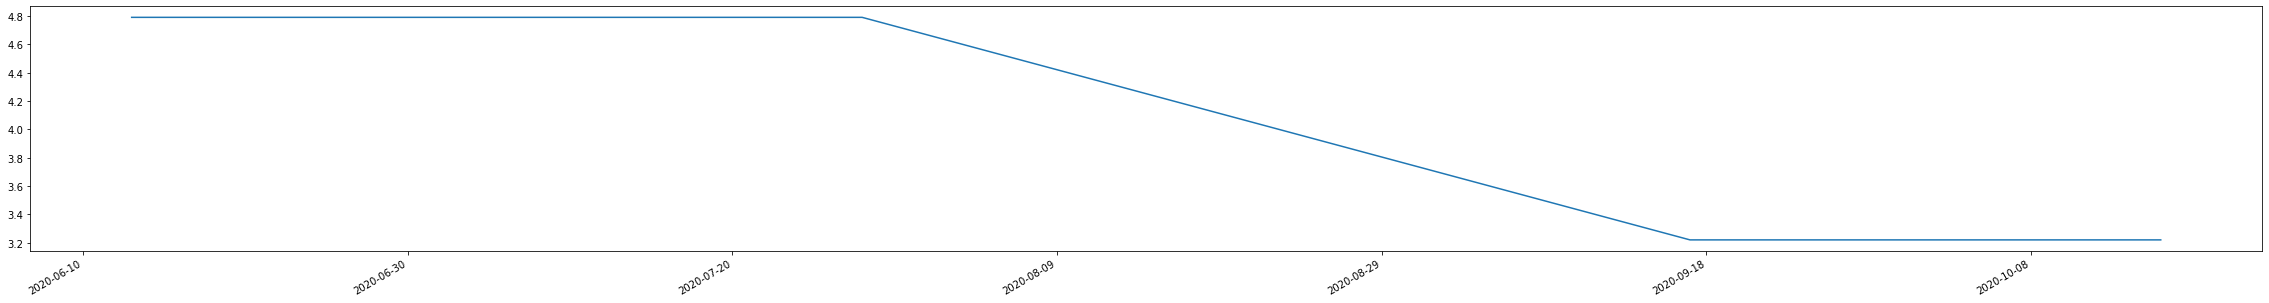

In [1]:
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import io
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
from IPython.display import display, HTML


uploader = widgets.FileUpload(
    accept='.csv',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False # True to accept multiple files upload else False
)

df_short = []

def _handle_upload(data):
    
    #use global variable so we can use csv values outside this funciton
    global df_short
        

    # the uploaded file
    uploaded_file = data.owner.value
    
    #read file to pandas dataframe
    for name, file_info in uploaded_file.items():
        df = pd.read_csv(io.BytesIO(file_info['content']))
        
    # use only interested values     
    df_short = df[['Id','Criteria','CpcBid','TopOfPageCpc','Date']]
    #filter out duplicate values for dropdown 
    subset = df_short[['Criteria','Id']]
    subset_2 = subset.drop_duplicates(subset=['Id'], keep='first')
    tuples = [tuple(x) for x in subset_2.to_numpy()]
    
    keywordId = widgets.Dropdown(
        options=tuples,
        description='Choose keyword:',
    )
    
    keywordId.observe(dropdown_eventhandler, names='value') 
    display(keywordId)

    
def dropdown_eventhandler(change):
    global df_short
    #print selected  keywordId
    print(change.new)
    selectedId = change.new
    
    #find all rows with this keywords
    df_keyword = df_short.loc[df_short['Id'] == selectedId]
    #sort those rows by date
    df_keyword = df_keyword.sort_values(by="Date")
    
    #print selected keyword
    print(df_keyword['Criteria'].iloc[0])
    
    # choose values for y axis: 'CpcBid' or 'TopOfPageCpc'
    y = df_keyword['CpcBid']
    
    # choose x-axis values, so dates
    days = df_keyword['Date']
    x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in days]
    
    #plot graph for choosen keyword
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
    plt.rcParams['figure.figsize'] = [40, 5]
    plt.plot(x,y)
    plt.gcf().autofmt_xdate()
    plt.show()
    # show table of values, some keywords have too many values and make it slow, but you can try
    #display(HTML(df_keyword.to_html()))
    


uploader.observe(_handle_upload, names='data')
display(uploader)